# 3 Exploratory Data Analysis<a id='3_Exploratory_Data_Analysis'></a>

Conduct EDA on telecom's customers' demographic and behavioral data to examine how dose relate the customer churn

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
from numpy import median
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from scipy import stats

## Load Data

In [2]:
# load the data
df = pd.read_csv('clean_data.csv')

In [3]:
# check out its appearance
df.head()

,CustomerID,Gender,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,7590-VHVEG,0,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,1,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# set first last as index
df_newind = df.set_index('CustomerID')

In [5]:
df_newind.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
CustomerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,1,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,1,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,0,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
# replace churn column with numeric binary values
df_newind.Churn.replace({"Yes":1, "No":0}, inplace = True)

In [9]:
# Creat dummy features of objuect type
dummy_df = pd.get_dummies(df_newind, drop_first=True)

<AxesSubplot:>

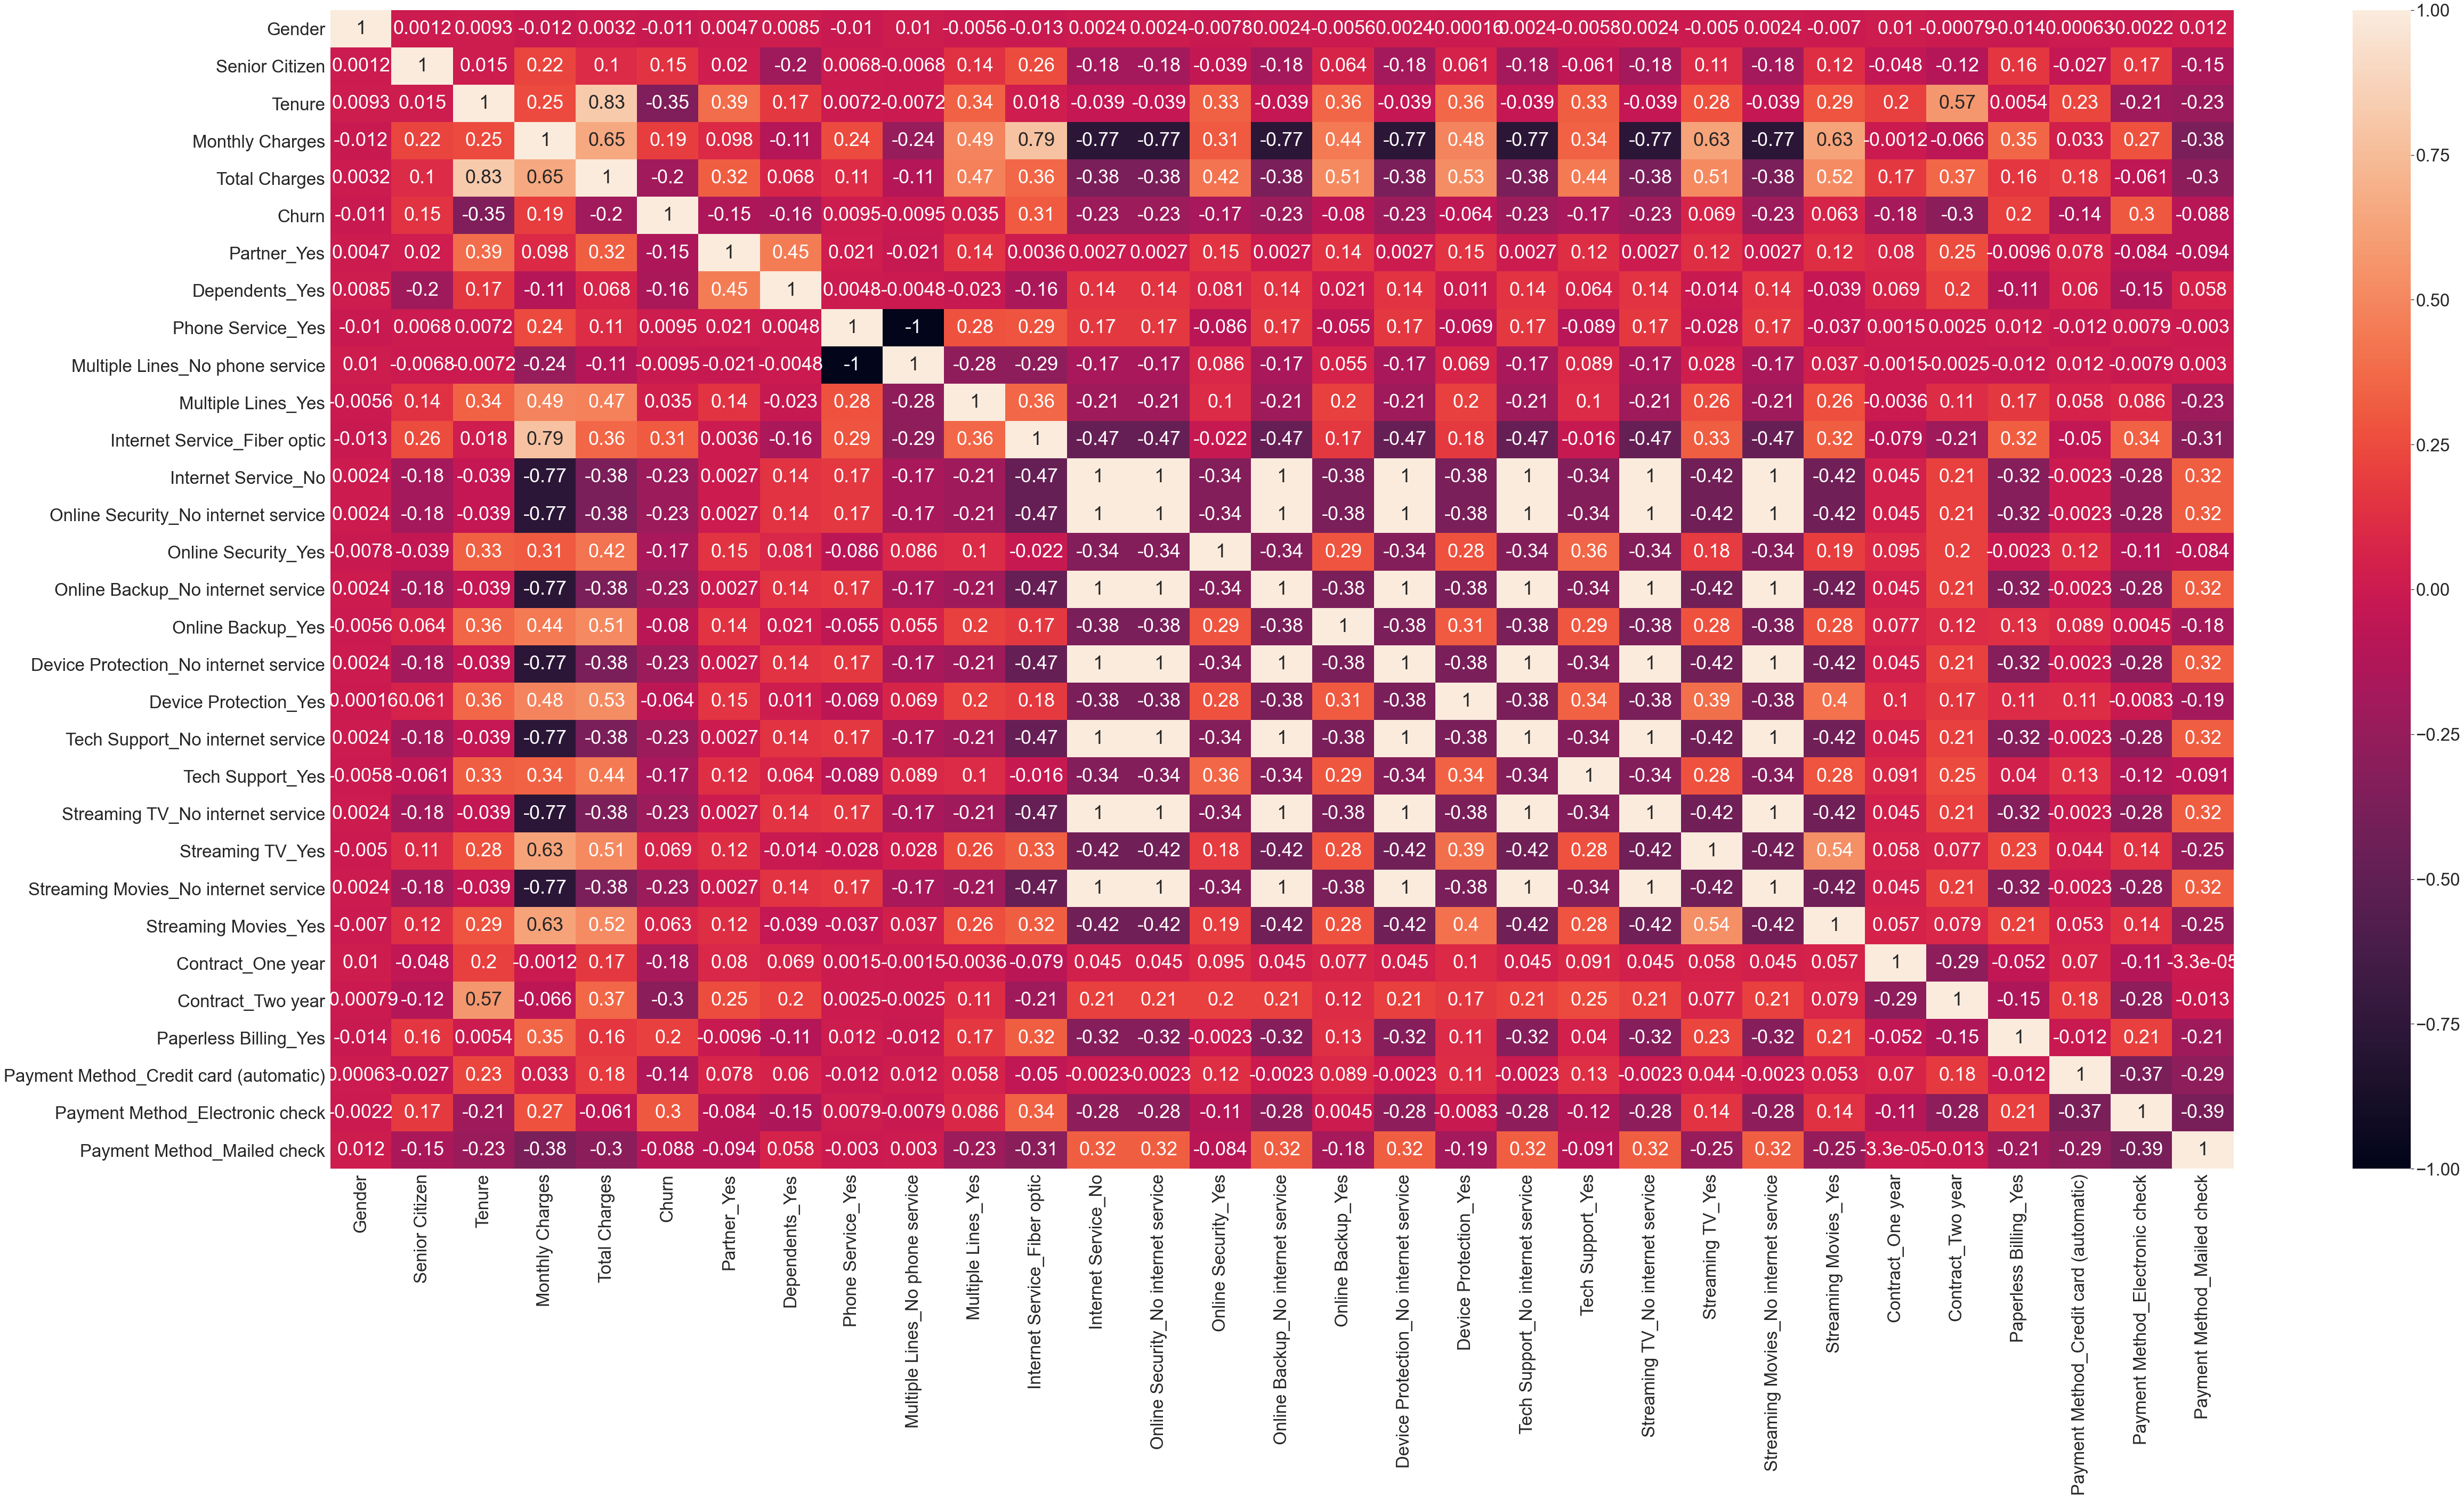

In [13]:
# Make a heatmap of the data
sns.set(font_scale=3)
plt.figure(figsize=(80,40))
sns.heatmap(dummy_df.corr(), annot=True)

As we can see from the heatmap above, there is no signal feature has very strong correlation with customer churn. The features that have the hightest correlation are Tenure, -.35 and payment method, .3.

More data exploratory on tableau.
link: https://public.tableau.com/app/profile/nick.chen5157/viz/NumericalValuesVSChurnRatio/NumericalValuesVsChurn